## Analyze Financial Data with Python Capstone

#### I am working as a wealth manager at a small firm where I have clients seeking advice on how to invest their money. A young client wants to invest a large amount of their savings in a portfolio of stocks, but they are unsure of what stocks to invest in and at what amounts.

#### In this capstone project, I will create a presentation that showcases a portfolio of stocks that I recommend the client invest in, and provide the weights at which they should invest in each stock depending on their risk preference.

#### The purpose of this capstone is to practice accessing and downloading financial data, calculating financial statistics to understand the individual performance of an asset and how groups of assets are related, and how to allocate investments across assets for optimal performance.



### Load the needed modules

In [1]:
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import numpy as np
import cvxopt as opt
from cvxopt import blas, solvers

### Download asset data

#### Start Date: 29 July 2017
#### End Date: 29 July 2022

#### Target Assets: Amazon - AMZN, Google - GOOGL, Tesla - TSLA, Toyota - TM, Exxon Mobil - XOM, Shell - SHEL, T-Mobile - TMUS and Verizon - VZ

#### The assets represent eight companies across four major industries.


In [2]:
# Relax the display limits on rows and columns
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

start = datetime(2017, 7, 29)
end = datetime(2022, 7, 29)

In [3]:
# Function to retrieve stocks
def get_stock(ticker):
    data = web.DataReader(f"{ticker}","yahoo",start,end)
    data[f'{ticker}'] = data["Adj Close"]
    data = data[[f'{ticker}']] 
    print(data.head())
    
    return data 

In [4]:
amazon = get_stock("AMZN")
google = get_stock("GOOGL")
tesla = get_stock("TSLA")
toyota = get_stock("TM")
em = get_stock("XOM")
shell = get_stock("SHEL")
t_mobile = get_stock("TMUS")
verizon = get_stock("VZ")

                 AMZN
Date                 
2017-07-31  49.389000
2017-08-01  49.809502
2017-08-02  49.794498
2017-08-03  49.346001
2017-08-04  49.379002
                GOOGL
Date                 
2017-07-31  47.275002
2017-08-01  47.327999
2017-08-02  47.382000
2017-08-03  47.014999
2017-08-04  47.289501
                 TSLA
Date                 
2017-07-31  64.694000
2017-08-01  63.914001
2017-08-02  65.178001
2017-08-03  69.417999
2017-08-04  71.382004
                    TM
Date                  
2017-07-31  112.839996
2017-08-01  114.169998
2017-08-02  114.190002
2017-08-03  112.730003
2017-08-04  113.639999
                  XOM
Date                 
2017-07-31  61.470264
2017-08-01  61.570114
2017-08-02  61.900352
2017-08-03  61.815872
2017-08-04  61.600849
                 SHEL
Date                 
2017-07-31  44.142868
2017-08-01  44.353699
2017-08-02  44.806610
2017-08-03  44.541119
2017-08-04  44.775375
                 TMUS
Date                 
2017-07-31  61.660000
201

In [5]:
from functools import reduce

def combine_stocks(tickers):
    data_frames = []
    for i in tickers:
        data_frames.append(get_stock(i))
        
    df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Date'], how='outer'), data_frames)
    print(df_merged.head())
    
    return df_merged

In [6]:
stocks = ["AMZN", "GOOGL", "TSLA", "TM", "XOM", "SHEL", "TMUS", "VZ"]
portfolio = combine_stocks(stocks)
print(portfolio.head())

                 AMZN
Date                 
2017-07-31  49.389000
2017-08-01  49.809502
2017-08-02  49.794498
2017-08-03  49.346001
2017-08-04  49.379002
                GOOGL
Date                 
2017-07-31  47.275002
2017-08-01  47.327999
2017-08-02  47.382000
2017-08-03  47.014999
2017-08-04  47.289501
                 TSLA
Date                 
2017-07-31  64.694000
2017-08-01  63.914001
2017-08-02  65.178001
2017-08-03  69.417999
2017-08-04  71.382004
                    TM
Date                  
2017-07-31  112.839996
2017-08-01  114.169998
2017-08-02  114.190002
2017-08-03  112.730003
2017-08-04  113.639999
                  XOM
Date                 
2017-07-31  61.470280
2017-08-01  61.570107
2017-08-02  61.900356
2017-08-03  61.815876
2017-08-04  61.600830
                 SHEL
Date                 
2017-07-31  44.142857
2017-08-01  44.353699
2017-08-02  44.806614
2017-08-03  44.541115
2017-08-04  44.775372
                 TMUS
Date                 
2017-07-31  61.660000
201

In [7]:
print(portfolio.head())

                 AMZN      GOOGL       TSLA          TM        XOM       SHEL  \
Date                                                                            
2017-07-31  49.389000  47.275002  64.694000  112.839996  61.470280  44.142857   
2017-08-01  49.809502  47.327999  63.914001  114.169998  61.570107  44.353699   
2017-08-02  49.794498  47.382000  65.178001  114.190002  61.900356  44.806614   
2017-08-03  49.346001  47.014999  69.417999  112.730003  61.815876  44.541115   
2017-08-04  49.379002  47.289501  71.382004  113.639999  61.600830  44.775372   

                 TMUS         VZ  
Date                              
2017-07-31  61.660000  38.707169  
2017-08-01  63.070000  39.099049  
2017-08-02  63.630001  38.555229  
2017-08-03  63.730000  38.875111  
2017-08-04  64.519997  39.115040  


### Plot the adjusted closing prices over time.

<Figure size 864x648 with 0 Axes>

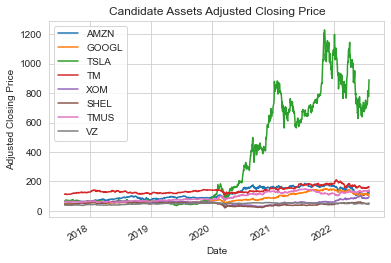

<function matplotlib.pyplot.clf()>

In [8]:
sns.set_style('whitegrid')
plt.figure(figsize = (12,9))
portfolio.plot()
plt.xlabel("Date")
plt.ylabel("Adjusted Closing Price")
plt.title("Candidate Assets Adjusted Closing Price")
plt.savefig('What Are The Adjusted Closing Price Over Time.png', dpi = 300, bbox_inches = 'tight')
plt.show()
plt.clf

### Calculate and plot the daily simple rate of return over time.

                AMZN     GOOGL      TSLA        TM       XOM      SHEL  \
Date                                                                     
2017-07-31       NaN       NaN       NaN       NaN       NaN       NaN   
2017-08-01  0.008514  0.001121 -0.012057  0.011787  0.001624  0.004776   
2017-08-02 -0.000301  0.001141  0.019777  0.000175  0.005364  0.010211   
2017-08-03 -0.009007 -0.007746  0.065053 -0.012786 -0.001365 -0.005925   
2017-08-04  0.000669  0.005839  0.028292  0.008072 -0.003479  0.005259   

                TMUS        VZ  
Date                            
2017-07-31       NaN       NaN  
2017-08-01  0.022867  0.010124  
2017-08-02  0.008879 -0.013909  
2017-08-03  0.001572  0.008297  
2017-08-04  0.012396  0.006172  


<Figure size 864x648 with 0 Axes>

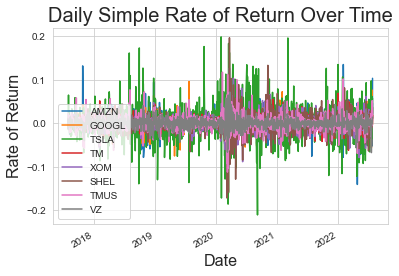

<function matplotlib.pyplot.clf()>

In [9]:
stock_data_daily_returns = portfolio.pct_change()
print(stock_data_daily_returns.head())
plt.figure(figsize = (12,9))
stock_data_daily_returns.plot()
plt.xlabel("Date", fontsize = 16)
plt.ylabel("Rate of Return", fontsize = 16)
plt.title("Daily Simple Rate of Return Over Time", fontsize = 20)
plt.legend(loc = 'lower left')
plt.savefig('What Are The Daily Simple Rates of Return Over Time.png', dpi = 300, bbox_inches = 'tight')
plt.show()
plt.clf

#### Visualize the daily simple rates of return

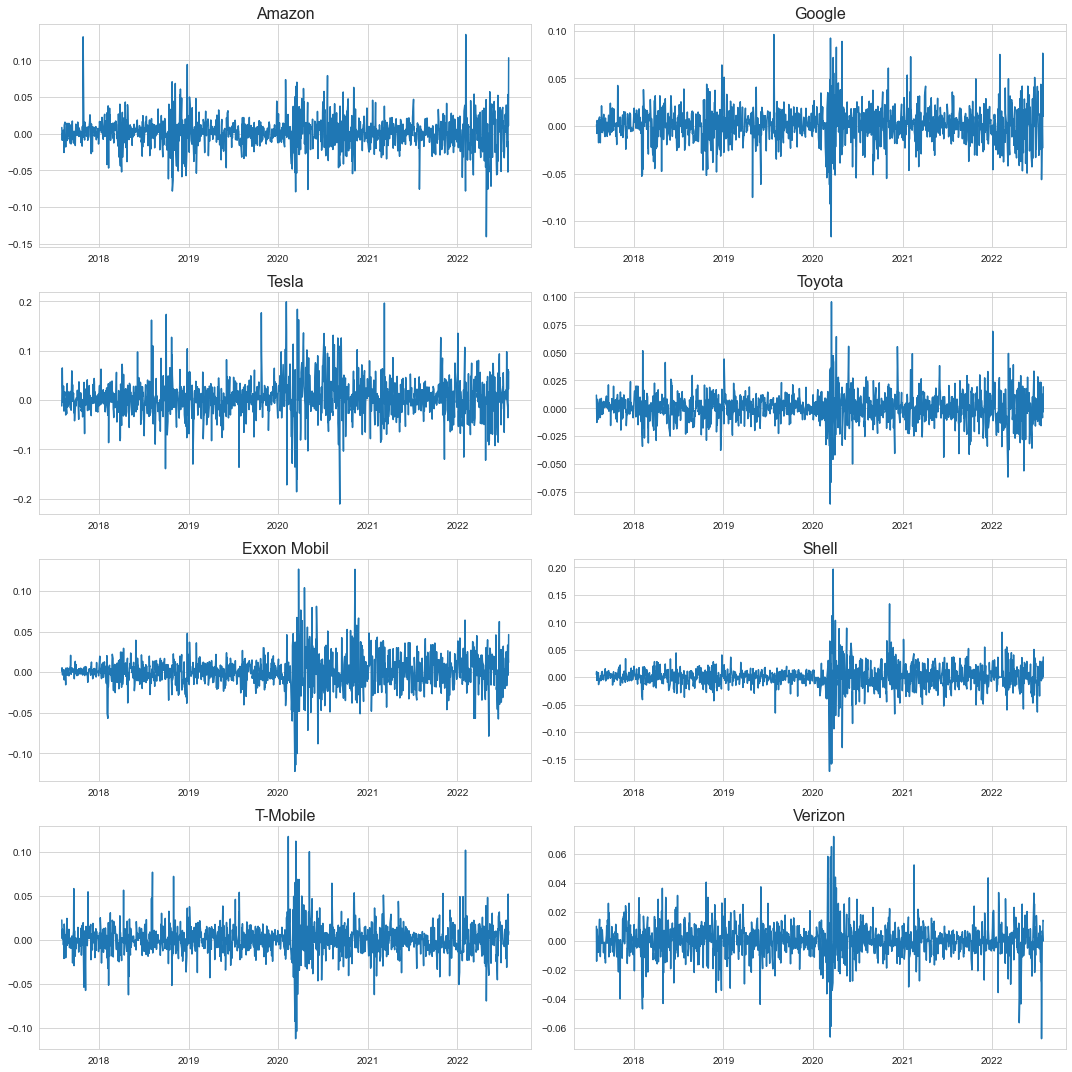

<function matplotlib.pyplot.clf()>

In [10]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(421)
ax2 = fig.add_subplot(422)
ax3 = fig.add_subplot(423)
ax4 = fig.add_subplot(424)
ax5 = fig.add_subplot(425)
ax6 = fig.add_subplot(426)
ax7 = fig.add_subplot(427)
ax8 = fig.add_subplot(428)
ax1.plot(portfolio['AMZN'].pct_change())
ax1.set_title("Amazon", fontsize = 16)
ax2.plot(portfolio['GOOGL'].pct_change())
ax2.set_title("Google", fontsize = 16)
ax3.plot(portfolio['TSLA'].pct_change())
ax3.set_title("Tesla", fontsize = 16)
ax4.plot(portfolio['TM'].pct_change())
ax4.set_title("Toyota", fontsize = 16)
ax5.plot(portfolio['XOM'].pct_change())
ax5.set_title("Exxon Mobil", fontsize = 16)
ax6.plot(portfolio['SHEL'].pct_change())
ax6.set_title("Shell", fontsize = 16)
ax7.plot(portfolio['TMUS'].pct_change())
ax7.set_title("T-Mobile", fontsize = 16)
ax8.plot(portfolio['VZ'].pct_change())
ax8.set_title("Verizon", fontsize = 16)
plt.tight_layout()
plt.savefig('What Are The Daily Simple Rates of Return Over Time Per Stock.png', dpi = 300, bbox_inches = 'tight')
plt.show()
plt.clf

### Calculate and plot the mean of each stock's daily simple rate of return.

In [11]:
daily_mean = stock_data_daily_returns.mean()

daily_mean

AMZN     0.001031
GOOGL    0.000892
TSLA     0.002892
TM       0.000388
XOM      0.000574
SHEL     0.000414
TMUS     0.000834
VZ       0.000215
dtype: float64

In [12]:
# daily mean index for the x axis
daily_mean.keys()

Index(['AMZN', 'GOOGL', 'TSLA', 'TM', 'XOM', 'SHEL', 'TMUS', 'VZ'], dtype='object')

In [13]:
# grab each daily mean value for the y axis
height = []
for key in daily_mean.keys():
    height.append(daily_mean[key])
height

[0.0010305103026451241,
 0.0008915478270967509,
 0.0028915119816415296,
 0.0003876124039156675,
 0.0005738775909802144,
 0.0004136314390159175,
 0.0008336921896877593,
 0.0002150776630375873]

In [14]:
# arrange keys on x axis based on length
x_pos = np.arange(len(daily_mean.keys()))
x_pos

array([0, 1, 2, 3, 4, 5, 6, 7])

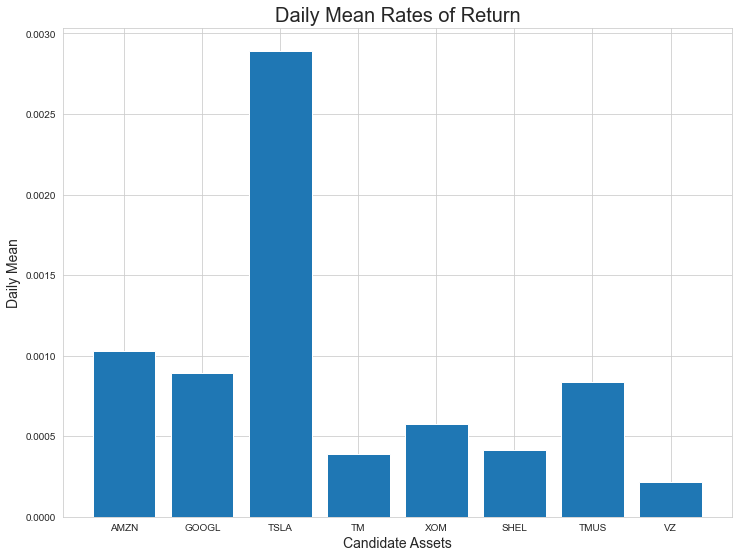

<function matplotlib.pyplot.clf()>

In [15]:
plt.figure(figsize = (12,9))

# plot bars
plt.bar(x_pos, height)
 
# create names on the x-axis
plt.xticks(x_pos, daily_mean.keys())

# label chart
plt.xlabel("Candidate Assets", fontsize = 14)
plt.ylabel("Daily Mean", fontsize = 14)
plt.title("Daily Mean Rates of Return", fontsize = 20)
plt.savefig('What Are The Daily Mean Rates of Return.png', dpi = 300, bbox_inches = 'tight')
plt.show()
plt.clf

### Calculate and plot the variance.

In [16]:
# calculate variance
daily_var = stock_data_daily_returns.var()
daily_var

AMZN     0.000463
GOOGL    0.000351
TSLA     0.001616
TM       0.000195
XOM      0.000424
SHEL     0.000521
TMUS     0.000330
VZ       0.000149
dtype: float64

In [17]:
# variance index for the x axis
daily_var.keys()

Index(['AMZN', 'GOOGL', 'TSLA', 'TM', 'XOM', 'SHEL', 'TMUS', 'VZ'], dtype='object')

In [18]:
# grab each variance value for the y axis
height = []
for key in daily_var.keys():
    height.append(daily_var[key])
height

[0.00046307012430969085,
 0.0003511905886794931,
 0.0016155614500363252,
 0.00019466328722545566,
 0.00042364397251840486,
 0.0005205889331456683,
 0.0003303525212348674,
 0.00014917205611036008]

In [19]:
# arrange keys on x axis based on length
x_pos = np.arange(len(daily_var.keys()))
x_pos

array([0, 1, 2, 3, 4, 5, 6, 7])

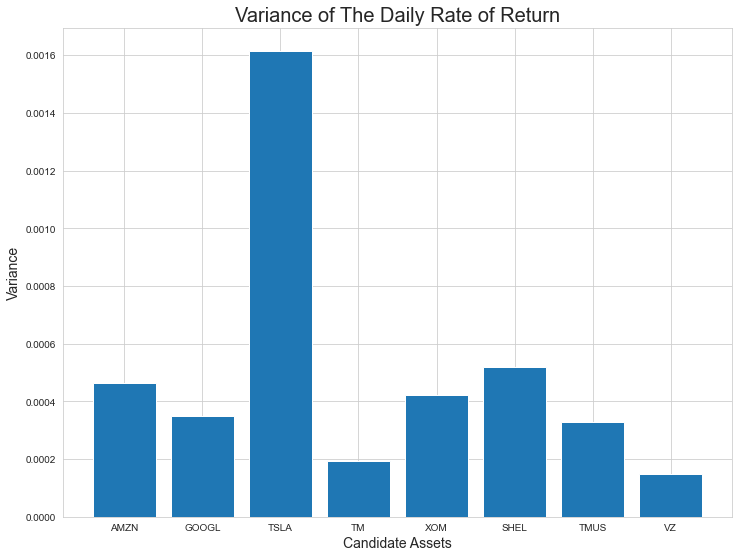

<function matplotlib.pyplot.clf()>

In [20]:
plt.figure(figsize = (12,9))
# plot bars
plt.bar(x_pos, height)
 
# create names on the x-axis
plt.xticks(x_pos, daily_var.keys())

# label chart
plt.xlabel("Candidate Assets", fontsize = 14)
plt.ylabel("Variance", fontsize = 14)
plt.title("Variance of The Daily Rate of Return", fontsize = 20)
plt.savefig('What Is The Variance of The Daily Rate of Return.png', dpi = 300, bbox_inches = 'tight')
# show graphic
plt.show()
plt.clf

### Calculate and plot the standard deviation.

In [21]:
# calculate standard deviation
daily_std = stock_data_daily_returns.std()
daily_std

AMZN     0.021519
GOOGL    0.018740
TSLA     0.040194
TM       0.013952
XOM      0.020583
SHEL     0.022816
TMUS     0.018176
VZ       0.012214
dtype: float64

In [22]:
# std index for the x axis
daily_std.keys()

Index(['AMZN', 'GOOGL', 'TSLA', 'TM', 'XOM', 'SHEL', 'TMUS', 'VZ'], dtype='object')

In [23]:
# grab each std value for the y axis
height = []
for key in daily_std.keys():
    height.append(daily_std[key])
height

[0.021519064206179852,
 0.01874007974047851,
 0.04019404744531614,
 0.013952178583484935,
 0.02058261335492665,
 0.022816418061248532,
 0.01817560236236663,
 0.012213601275232465]

In [24]:
# arrange keys on x axis based on length
x_pos = np.arange(len(daily_var.keys()))
x_pos

array([0, 1, 2, 3, 4, 5, 6, 7])

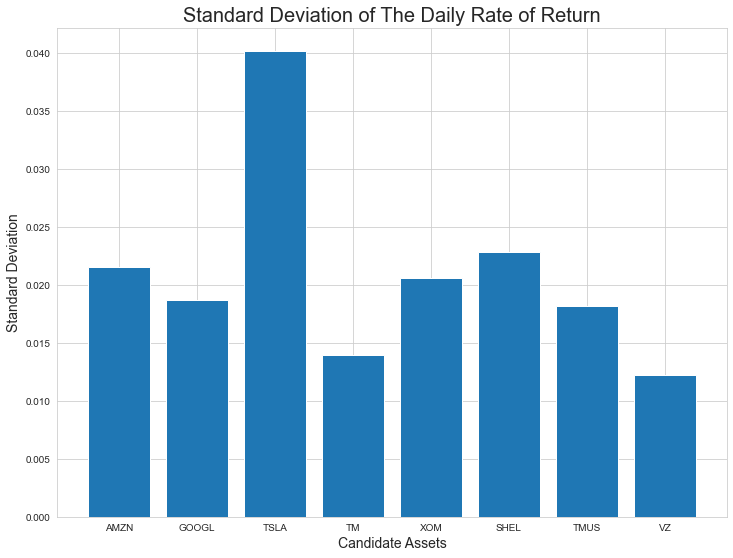

<function matplotlib.pyplot.clf()>

In [25]:
plt.figure(figsize = (12,9))
# plot bars
plt.bar(x_pos, height)
 
# create names on the x-axis
plt.xticks(x_pos, daily_std.keys())

# label chart
plt.xlabel("Candidate Assets", fontsize  =14)
plt.ylabel("Standard Deviation", fontsize = 14)
plt.title("Standard Deviation of The Daily Rate of Return", fontsize = 20)
plt.savefig('What Is The Standard Deviation of The Daily Rate of Return.png', dpi = 300, bbox_inches = 'tight')
# show graphic
plt.show()
plt.clf

### Calculate the correlations.

In [26]:
corr = stock_data_daily_returns.corr()
corr.to_csv('Correlations.csv')
corr

,AMZN,GOOGL,TSLA,TM,XOM,SHEL,TMUS,VZ
AMZN,1.000000,0.669968,0.414774,0.351716,0.211725,0.191790,0.427824,0.173485
GOOGL,0.669968,1.000000,0.406042,0.486312,0.380145,0.365216,0.489863,0.285748
TSLA,0.414774,0.406042,1.000000,0.281754,0.199982,0.235871,0.271863,0.065906
TM,0.351716,0.486312,0.281754,1.000000,0.423040,0.417866,0.335024,0.321188
XOM,0.211725,0.380145,0.199982,0.423040,1.000000,0.788334,0.310116,0.345514
SHEL,0.191790,0.365216,0.235871,0.417866,0.788334,1.000000,0.324680,0.272845
TMUS,0.427824,0.489863,0.271863,0.335024,0.310116,0.324680,1.000000,0.408742
VZ,0.173485,0.285748,0.065906,0.321188,0.345514,0.272845,0.408742,1.000000


In [27]:
covariance_return = stock_data_daily_returns.cov()
covariance_return.to_csv('Covariance.csv')
covariance_return

,AMZN,GOOGL,TSLA,TM,XOM,SHEL,TMUS,VZ
AMZN,0.000463,0.000270,0.000359,0.000106,0.000094,0.000094,0.000167,0.000046
GOOGL,0.000270,0.000351,0.000306,0.000127,0.000147,0.000156,0.000167,0.000065
TSLA,0.000359,0.000306,0.001616,0.000158,0.000165,0.000216,0.000199,0.000032
TM,0.000106,0.000127,0.000158,0.000195,0.000121,0.000133,0.000085,0.000055
XOM,0.000094,0.000147,0.000165,0.000121,0.000424,0.000370,0.000116,0.000087
SHEL,0.000094,0.000156,0.000216,0.000133,0.000370,0.000521,0.000135,0.000076
TMUS,0.000167,0.000167,0.000199,0.000085,0.000116,0.000135,0.000330,0.000091
VZ,0.000046,0.000065,0.000032,0.000055,0.000087,0.000076,0.000091,0.000149


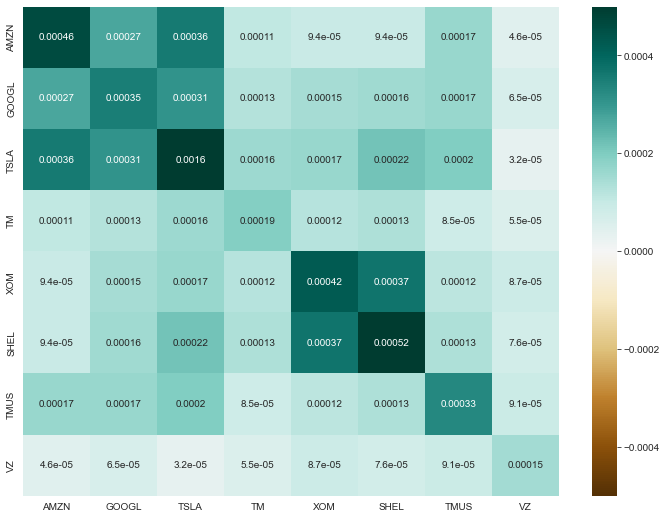

<function matplotlib.pyplot.clf()>

In [28]:
plt.figure(figsize = (12,9))
corr_returns_heatmap = sns.heatmap(covariance_return, vmin=-0.0005, vmax=0.0005, annot=True, cmap='BrBG')
plt.savefig('What Does The Covariance Heat Map Look Like.png', dpi = 300, bbox_inches = 'tight')
# show graphic
plt.show()
plt.clf

#### Determine Optimal Portfolio

In [29]:
# Load modules to calculate.
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage

mu = mean_historical_return(portfolio)
S = CovarianceShrinkage(portfolio).ledoit_wolf()

In [30]:
# Calculate Efficient Frontier
from pypfopt.efficient_frontier import EfficientFrontier

ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()

cleaned_weights = ef.clean_weights()
print(dict(cleaned_weights))

{'AMZN': 0.07017, 'GOOGL': 0.06169, 'TSLA': 0.54018, 'TM': 0.0, 'XOM': 0.0, 'SHEL': 0.0, 'TMUS': 0.32795, 'VZ': 0.0}


#### Display portfolio performance.

In [31]:
ef.portfolio_performance(verbose=True)

Expected annual return: 46.1%
Annual volatility: 40.1%
Sharpe Ratio: 1.10


(0.4614742836098433, 0.4007834933340365, 1.1015281091975828)

### Sharpe Ratio Grading Thresholds:
#### Less than 1: Bad
#### 1 – 1.99: Adequate/good
#### 2 – 2.99: Very good
#### Greater than 3: Excellent


#### Analysis: The maximum Sharpe Ratio, 1.10, for this portfolio is Adequate/good.

#### Assemble portfolio with an initial investment of $100,000 as of close of market 5 August 2022.

In [32]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(portfolio)

da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=100000)

allocation, leftover = da.greedy_portfolio()
print("Discrete allocation:", allocation)
print("Funds remaining: ${:.2f}".format(leftover))

Discrete allocation: {'TSLA': 60, 'TMUS': 229, 'AMZN': 52, 'GOOGL': 53}
Funds remaining: $569.90


#### Determine Risk-Based portfolios using Mean-Variance Portfolio Optimization

In [33]:
def return_portfolios(expected_returns, cov_matrix):
    port_returns = []
    port_volatility = []
    stock_weights = []
    
    selected = (expected_returns.axes)[0]
    
    num_assets = len(selected) 
    num_portfolios = 5000
    
    for single_portfolio in range(num_portfolios):
        weights = np.random.random(num_assets)
        weights /= np.sum(weights)
        returns = np.dot(weights, expected_returns)
        volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
        port_returns.append(returns)
        port_volatility.append(volatility)
        stock_weights.append(weights)
    
    portfolio = {'Returns': port_returns,
                 'Volatility': port_volatility}
    
    for counter,symbol in enumerate(selected):
        portfolio[symbol +' Weight'] = [Weight[counter] for Weight in stock_weights]
    
    df = pd.DataFrame(portfolio)
    
    column_order = ['Returns', 'Volatility'] + [stock+' Weight' for stock in selected]
    
    df = df[column_order]
   
    return df
  
def optimal_portfolio(returns):
    n = returns.shape[1]
    returns = np.transpose(returns.to_numpy())

    N = 100
    mus = [10**(5.0 * t/N - 1.0) for t in range(N)]

    # Convert to cvxopt matrices
    S = opt.matrix(np.cov(returns))
    pbar = opt.matrix(np.mean(returns, axis=1))

    # Create constraint matrices
    G = -opt.matrix(np.eye(n))   # negative n x n identity matrix
    h = opt.matrix(0.0, (n ,1))
    A = opt.matrix(1.0, (1, n))
    b = opt.matrix(1.0)

    # Calculate efficient frontier weights using quadratic programming
    portfolios = [solvers.qp(mu*S, -pbar, G, h, A, b)['x']
                  for mu in mus]
    ## CALCULATE RISKS AND RETURNS FOR FRONTIER
    returns = [blas.dot(pbar, x) for x in portfolios]
    risks = [np.sqrt(blas.dot(x, S*x)) for x in portfolios]
    ## CALCULATE THE 2ND DEGREE POLYNOMIAL OF THE FRONTIER CURVE
    m1 = np.polyfit(returns, risks, 2)
    x1 = np.sqrt(m1[2] / m1[0])
    # CALCULATE THE OPTIMAL PORTFOLIO
    wt = solvers.qp(opt.matrix(x1 * S), -pbar, G, h, A, b)['x']
    
    return np.asarray(wt), returns, risks

In [34]:
# Create 5000 potential portfolios from the data
random_portfolios = return_portfolios(daily_mean, covariance_return)

selected=list(portfolio.columns[1:])
print(selected)
list_stock_data_daily_returns = portfolio[selected].pct_change()

random_portfolios = return_portfolios(daily_mean, covariance_return) 

weights, returns, risks = optimal_portfolio(list_stock_data_daily_returns[1:])



['GOOGL', 'TSLA', 'TM', 'XOM', 'SHEL', 'TMUS', 'VZ']
     pcost       dcost       gap    pres   dres
 0: -8.8186e-04 -1.0029e+00  1e+00  1e-16  3e+00
 1: -8.8327e-04 -1.2863e-02  1e-02  7e-17  4e-02
 2: -1.0054e-03 -2.9565e-03  2e-03  6e-17  6e-03
 3: -2.7115e-03 -3.9148e-03  1e-03  2e-15  2e-03
 4: -2.7987e-03 -2.8218e-03  2e-05  2e-16  3e-05
 5: -2.8106e-03 -2.8108e-03  2e-07  1e-16  3e-07
 6: -2.8107e-03 -2.8107e-03  2e-09  1e-16  3e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -8.8065e-04 -1.0029e+00  1e+00  0e+00  3e+00
 1: -8.8206e-04 -1.2859e-02  1e-02  1e-16  4e-02
 2: -1.0039e-03 -2.9523e-03  2e-03  6e-17  6e-03
 3: -2.7033e-03 -3.9035e-03  1e-03  7e-16  2e-03
 4: -2.7889e-03 -2.8119e-03  2e-05  4e-17  3e-05
 5: -2.8008e-03 -2.8010e-03  2e-07  1e-16  3e-07
 6: -2.8009e-03 -2.8009e-03  2e-09  1e-16  3e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -8.7930e-04 -1.0029e+00  1e+00  2e-16  3e+00
 1: -8.8070e-04 -1.2

 7:  9.6020e-02  9.6020e-02  9e-09  1e-16  6e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.3401e-01 -9.5246e-01  1e+00  1e-16  3e+00
 1:  1.2748e-01  4.9267e-02  8e-02  1e-16  2e-01
 2:  1.1049e-01  9.8344e-02  1e-02  1e-16  2e-03
 3:  1.0800e-01  1.0673e-01  1e-03  2e-16  1e-16
 4:  1.0779e-01  1.0769e-01  1e-04  1e-16  4e-17
 5:  1.0778e-01  1.0778e-01  6e-06  3e-17  8e-17
 6:  1.0778e-01  1.0778e-01  4e-07  9e-19  7e-17
 7:  1.0778e-01  1.0778e-01  7e-09  6e-17  5e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.4804e-01 -9.4275e-01  1e+00  2e-16  3e+00
 1:  1.4080e-01  6.0631e-02  8e-02  8e-17  2e-01
 2:  1.2371e-01  1.1147e-01  1e-02  1e-16  4e-03
 3:  1.2119e-01  1.1992e-01  1e-03  1e-16  1e-16
 4:  1.2099e-01  1.2089e-01  1e-04  6e-17  1e-16
 5:  1.2098e-01  1.2097e-01  6e-06  1e-16  1e-16
 6:  1.2098e-01  1.2098e-01  4e-07  3e-16  6e-17
 7:  1.2098e-01  1.2098e-01  5e-09  2e-16  8e-17
Optimal solution found.

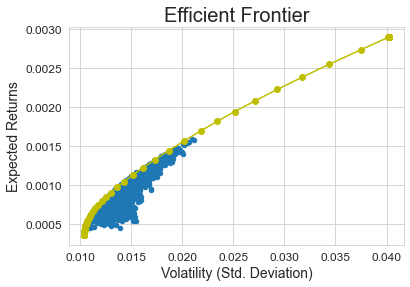

In [35]:
random_portfolios.plot.scatter(x='Volatility', y='Returns', fontsize=12)
try:
  plt.plot(risks, returns, 'y-o')
except:
  pass
plt.ylabel('Expected Returns',fontsize = 14)
plt.xlabel('Volatility (Std. Deviation)',fontsize = 14)
plt.title('Efficient Frontier', fontsize=20)
plt.show()

In [36]:
# Define function to get risk-based recommendation

def portfolio_recommendation(random_portfolios,maximum_volatility_tolerance):
    eligible_portfolios = random_portfolios[(random_portfolios.Volatility<=maximum_volatility_tolerance)]
    max_return = eligible_portfolios.Returns.max()
    max_return_portfolio = eligible_portfolios[eligible_portfolios.Returns == max_return]
    
    return max_return_portfolio

In [37]:
risk_averse = 0.01
moderate_risk_taker = 0.015
risk_tolerant = 0.02

risk_averse_portfolio = portfolio_recommendation(random_portfolios, risk_averse)
print(risk_averse_portfolio)
moderate_risk_taker_portfolio = portfolio_recommendation(random_portfolios, moderate_risk_taker)
print(moderate_risk_taker_portfolio)
risk_tolerant_portfolio = portfolio_recommendation(random_portfolios, risk_tolerant)
print(risk_tolerant_portfolio)
combined_portfolios = pd.concat([risk_averse_portfolio, moderate_risk_taker_portfolio, risk_tolerant_portfolio], 
                                ignore_index = True, sort = False)
print(combined_portfolios)
rounded_combined_portfolios = round(combined_portfolios, 4)
print(rounded_combined_portfolios)
combined_portfolios.to_csv('rounded_combined_portfolios_1.csv')

Empty DataFrame
Columns: [Returns, Volatility, AMZN Weight, GOOGL Weight, TSLA Weight, TM Weight, XOM Weight, SHEL Weight, TMUS Weight, VZ Weight]
Index: []
       Returns  Volatility  AMZN Weight  GOOGL Weight  TSLA Weight  TM Weight  \
1445  0.001096    0.014899     0.098991      0.009081     0.225887   0.140786   

      XOM Weight  SHEL Weight  TMUS Weight  VZ Weight  
1445    0.129346     0.024659     0.184696   0.186554  
      Returns  Volatility  AMZN Weight  GOOGL Weight  TSLA Weight  TM Weight  \
323  0.001476    0.019581     0.048179      0.242064     0.354706   0.127846   

     XOM Weight  SHEL Weight  TMUS Weight  VZ Weight  
323    0.054525     0.036837     0.096915   0.038927  
    Returns  Volatility  AMZN Weight  GOOGL Weight  TSLA Weight  TM Weight  \
0  0.001096    0.014899     0.098991      0.009081     0.225887   0.140786   
1  0.001476    0.019581     0.048179      0.242064     0.354706   0.127846   

   XOM Weight  SHEL Weight  TMUS Weight  VZ Weight  
0    0.12

#### The Risk Averse criteria did not yield a portfolio.

In [38]:
risk_averse = 0.02
moderate_risk_taker = 0.03
risk_tolerant = 0.04

risk_averse_portfolio = portfolio_recommendation(random_portfolios, risk_averse)
print(risk_averse_portfolio)
moderate_risk_taker_portfolio = portfolio_recommendation(random_portfolios, moderate_risk_taker)
print(moderate_risk_taker_portfolio)
risk_tolerant_portfolio = portfolio_recommendation(random_portfolios, risk_tolerant)
print(risk_tolerant_portfolio)
combined_portfolios = pd.concat([risk_averse_portfolio, moderate_risk_taker_portfolio, risk_tolerant_portfolio], 
                                ignore_index = True, sort = False)
print(combined_portfolios)
rounded_combined_portfolios = round(combined_portfolios, 4)
print(rounded_combined_portfolios)
rounded_combined_portfolios.to_csv('rounded_combined_portfolios_2.csv')

      Returns  Volatility  AMZN Weight  GOOGL Weight  TSLA Weight  TM Weight  \
323  0.001476    0.019581     0.048179      0.242064     0.354706   0.127846   

     XOM Weight  SHEL Weight  TMUS Weight  VZ Weight  
323    0.054525     0.036837     0.096915   0.038927  
      Returns  Volatility  AMZN Weight  GOOGL Weight  TSLA Weight  TM Weight  \
513  0.001586    0.020917     0.064303      0.339606     0.371241   0.000729   

     XOM Weight  SHEL Weight  TMUS Weight  VZ Weight  
513    0.128746     0.001318     0.079084   0.014972  
      Returns  Volatility  AMZN Weight  GOOGL Weight  TSLA Weight  TM Weight  \
513  0.001586    0.020917     0.064303      0.339606     0.371241   0.000729   

     XOM Weight  SHEL Weight  TMUS Weight  VZ Weight  
513    0.128746     0.001318     0.079084   0.014972  
    Returns  Volatility  AMZN Weight  GOOGL Weight  TSLA Weight  TM Weight  \
0  0.001476    0.019581     0.048179      0.242064     0.354706   0.127846   
1  0.001586    0.020917     0.0

#### The Moderate Risk Taker and the Risk Tolerant portfolios are identical.